<a href="https://colab.research.google.com/github/ParnaChat/Google-Store-Review/blob/main/Google_Store_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the dataset**

In [4]:
#Basic libraries
import pandas as pd
import numpy as np

In [5]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
reviews = pd.read_csv('/content/reviews.csv')

In [7]:
print (reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB
None


In [8]:
# To find the dimension of the data
reviews.shape

(12495, 12)

In [9]:
# Visualising a sample of data
reviews.head()

reviewId  \
0  gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1  gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2  gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3  gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4  gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   

                           userName  \
0                          Eric Tie   
1                        john alpha   
2                       Sudhakar .S   
3  SKGflorida@bellsouth.net DAVID S   
4                     Louann Stoker   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AOh14...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a-/AOh14...   
3  https://play-lh.googleusercontent.com/-75aK0WF...   
4  https://play-lh.googleusercontent.com/-pBcY_Z-...   

                                             content  score  thumbsUpCount  \
0                      I cannot open the app anymore      1              0   
1  I have been begging for a refund from this app...      1              0   
2  Very costly for the premium version (approx In...      1              0   
3  Used to keep me organized, but all the 2020 UP...      1              0   
4                                Dan Birthday Oct 28      1              0   

  reviewCreatedVersion                   at  \
0              5.4.0.6  2020-10-27 21:24:41   
1                  NaN  2020-10-27 14:03:28   
2                  NaN  2020-10-27 08:18:40   
3                  NaN  2020-10-26 13:28:07   
4              5.6.0.7  2020-10-26 06:10:50   

                                        replyContent            repliedAt  \
0                                                NaN                  NaN   
1  Please note that from checking our records, yo...  2020-10-27 15:05:52   
2                                                NaN                  NaN   
3  What do you find troublesome about the update?...  2020-10-26 14:58:29   
4                                                NaN                  NaN   

  sortOrder      appId  
0    newest  com.anydo  
1    newest  com.anydo  
2    newest  com.anydo  
3    newest  com.anydo  
4    newest  com.anydo

# **Preprocessing and cleaning**

In [10]:
reviews['score'].unique()

array([1, 2, 3, 4, 5])

In [11]:
#Creating a copy
process_reviews=reviews.copy()

In [12]:
# Checking duplicate values if present in the data
duplicate_rows = process_reviews[process_reviews.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 12)


In [13]:
#Checking for null values
round(((process_reviews.isna().sum())*100/12495),2)

reviewId                 0.00
userName                 0.00
userImage                0.00
content                  0.00
score                    0.00
thumbsUpCount            0.00
reviewCreatedVersion    17.30
at                       0.00
replyContent            53.44
repliedAt               53.44
sortOrder                0.00
appId                    0.00
dtype: float64

We got null values in 3 variables, such as reviewCreatedVersion, replyContent, and repliedAt. The variable reviewCreatedVersion doesn't add any value to our objective of the project. So we are ommittig the variable.

In [14]:
# Deleting the unsignificant columns due to presence of null values in the data
process_reviews.drop(['reviewCreatedVersion'],axis=1,inplace=True)

In [15]:
# Convert the column containing dates to datetime format
process_reviews['at'] = pd.to_datetime(process_reviews['at'], errors='coerce')
process_reviews['repliedAt'] = pd.to_datetime(process_reviews['repliedAt'], errors='coerce')

In [16]:
# Replace missing dates with a median value
median_date = process_reviews['repliedAt'].median()
process_reviews['repliedAt'].fillna(median_date, inplace=True)

The variable replyContent contains cases with no response. So we are replacing the variable.

In [17]:
# replacing the null values with mode
process_reviews['replyContent'].fillna("No response", inplace=True)

In [18]:
#Checking if any null values remains in the columns
round(((process_reviews.isna().sum())*100/12495),2)

reviewId         0.0
userName         0.0
userImage        0.0
content          0.0
score            0.0
thumbsUpCount    0.0
at               0.0
replyContent     0.0
repliedAt        0.0
sortOrder        0.0
appId            0.0
dtype: float64

## Removing unnecessary variables
The variable userName (we have unique reviewId for user) and userImage doesn't add any value to our objective of the project. So we are ommittig the variable.

In [19]:
process_reviews.drop(['userName'],axis=1,inplace=True)
process_reviews.drop(['userImage'],axis=1,inplace=True)

In [20]:
process_reviews

reviewId  \
0      gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1      gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2      gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3      gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4      gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   
...                                                  ...   
12490  gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...   
12491  gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...   
12492  gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...   
12493  gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...   
12494  gp:AOqpTOFuJtS1McUdEZuLCnRn7k-UUcGNml7XqxKTSk2...   

                                                 content  score  \
0                          I cannot open the app anymore      1   
1      I have been begging for a refund from this app...      1   
2      Very costly for the premium version (approx In...      1   
3      Used to keep me organized, but all the 2020 UP...      1   
4                                    Dan Birthday Oct 28      1   
...                                                  ...    ...   
12490  I really like the planner, it helps me achieve...      5   
12491                                             😁****😁      5   
12492                  Very useful apps. You must try it      5   
12493  Would pay for this if there were even more add...      5   
12494                                         Sooow good      5   

       thumbsUpCount                  at  \
0                  0 2020-10-27 21:24:41   
1                  0 2020-10-27 14:03:28   
2                  0 2020-10-27 08:18:40   
3                  0 2020-10-26 13:28:07   
4                  0 2020-10-26 06:10:50   
...              ...                 ...   
12490              0 2018-12-21 00:13:09   
12491              0 2018-12-12 21:52:56   
12492              0 2018-12-11 15:49:43   
12493              0 2018-12-06 04:59:26   
12494              0 2018-11-26 01:19:13   

                                            replyContent           repliedAt  \
0                                            No response 2020-05-27 16:38:27   
1      Please note that from checking our records, yo... 2020-10-27 15:05:52   
2                                            No response 2020-05-27 16:38:27   
3      What do you find troublesome about the update?... 2020-10-26 14:58:29   
4                                            No response 2020-05-27 16:38:27   
...                                                  ...                 ...   
12490                                        No response 2020-05-27 16:38:27   
12491                                        No response 2020-05-27 16:38:27   
12492                                        No response 2020-05-27 16:38:27   
12493                                        No response 2020-05-27 16:38:27   
12494                                        No response 2020-05-27 16:38:27   

      sortOrder              appId  
0        newest          com.anydo  
1        newest          com.anydo  
2        newest          com.anydo  
3        newest          com.anydo  
4        newest          com.anydo  
...         ...                ...  
12490    newest  com.appxy.planner  
12491    newest  com.appxy.planner  
12492    newest  com.appxy.planner  
12493    newest  com.appxy.planner  
12494    newest  com.appxy.planner  

[12495 rows x 9 columns]

## Creating 'sentiment' column
This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment.

In [21]:
#Figuring out the distribution of categories
process_reviews['score'].value_counts()

5    2879
4    2775
1    2506
2    2344
3    1991
Name: score, dtype: int64

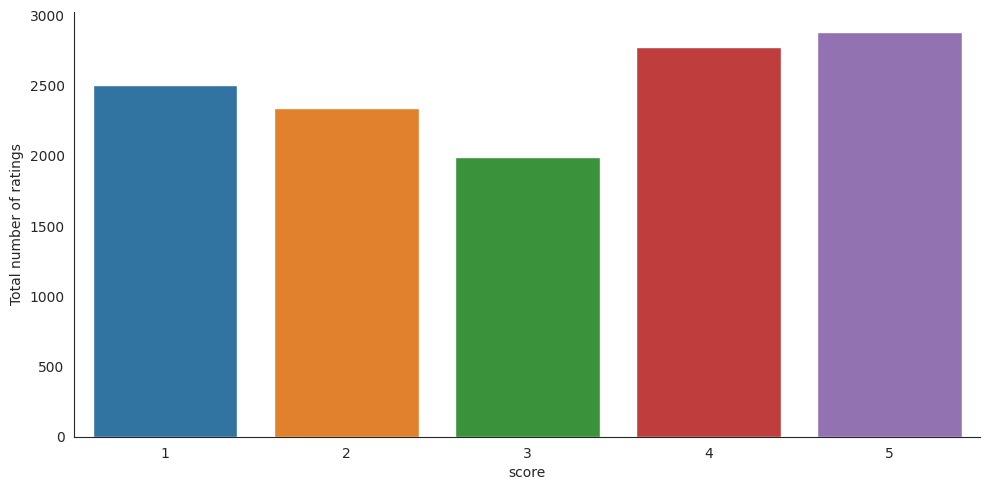

In [22]:
# Graphical representation of the review rating
import seaborn as sns

with sns.axes_style('white'):
    g = sns.catplot(x="score", data=process_reviews, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

From the plot, it can be viewed that ratings are more or less uniformly distributed.

In [23]:
def f(row):

    '''This function returns sentiment value based on the overall ratings from the user'''

    if row['score'] == 3.0:
        val = 'Neutral'
    elif row['score'] == 1.0 or row['score'] == 2.0:
        val = 'Negative'
    elif row['score'] == 4.0 or row['score'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [24]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

reviewId  \
0  gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1  gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2  gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3  gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4  gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   

                                             content  score  thumbsUpCount  \
0                      I cannot open the app anymore      1              0   
1  I have been begging for a refund from this app...      1              0   
2  Very costly for the premium version (approx In...      1              0   
3  Used to keep me organized, but all the 2020 UP...      1              0   
4                                Dan Birthday Oct 28      1              0   

                   at                                       replyContent  \
0 2020-10-27 21:24:41                                        No response   
1 2020-10-27 14:03:28  Please note that from checking our records, yo...   
2 2020-10-27 08:18:40                                        No response   
3 2020-10-26 13:28:07  What do you find troublesome about the update?...   
4 2020-10-26 06:10:50                                        No response   

            repliedAt sortOrder      appId sentiment  
0 2020-05-27 16:38:27    newest  com.anydo  Negative  
1 2020-10-27 15:05:52    newest  com.anydo  Negative  
2 2020-05-27 16:38:27    newest  com.anydo  Negative  
3 2020-10-26 14:58:29    newest  com.anydo  Negative  
4 2020-05-27 16:38:27    newest  com.anydo  Negative

In [25]:
process_reviews['sentiment'].value_counts()

Positive    5654
Negative    4850
Neutral     1991
Name: sentiment, dtype: int64

Review text-Punctuation Cleaning

In [26]:
#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [28]:
process_reviews['content']=process_reviews['content'].apply(lambda x:review_cleaning(x))
process_reviews.head()

reviewId  \
0  gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1  gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2  gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3  gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4  gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   

                                             content  score  thumbsUpCount  \
0                      i cannot open the app anymore      1              0   
1  i have been begging for a refund from this app...      1              0   
2  very costly for the premium version approx ind...      1              0   
3  used to keep me organized but all the  updates...      1              0   
4                                  dan birthday oct       1              0   

                   at                                       replyContent  \
0 2020-10-27 21:24:41                                        No response   
1 2020-10-27 14:03:28  Please note that from checking our records, yo...   
2 2020-10-27 08:18:40                                        No response   
3 2020-10-26 13:28:07  What do you find troublesome about the update?...   
4 2020-10-26 06:10:50                                        No response   

            repliedAt sortOrder      appId sentiment  
0 2020-05-27 16:38:27    newest  com.anydo  Negative  
1 2020-10-27 15:05:52    newest  com.anydo  Negative  
2 2020-05-27 16:38:27    newest  com.anydo  Negative  
3 2020-10-26 14:58:29    newest  com.anydo  Negative  
4 2020-05-27 16:38:27    newest  com.anydo  Negative

## Review text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So the stop words which doesn't have any negative sentiment or any negative alternatives is being curated.

In [29]:
with open("/content/stop.txt","r") as sw:
    stop_words = sw.read()

stop_words = stop_words.split("\n")

stop_words.extend(["time","android","phone","device","screen","battery","product","good","day","price"])

In [30]:
process_reviews['content'] = process_reviews['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

reviewId  \
0  gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1  gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2  gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3  gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4  gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   

                                             content  score  thumbsUpCount  \
0                                   open app anymore      1              0   
1                  begging refund app month replying      1              0   
2  costly premium version approx indian rupees ye...      1              0   
3  organized updates made mess things cudnt leave...      1              0   
4                                   dan birthday oct      1              0   

                   at                                       replyContent  \
0 2020-10-27 21:24:41                                        No response   
1 2020-10-27 14:03:28  Please note that from checking our records, yo...   
2 2020-10-27 08:18:40                                        No response   
3 2020-10-26 13:28:07  What do you find troublesome about the update?...   
4 2020-10-26 06:10:50                                        No response   

            repliedAt sortOrder      appId sentiment  
0 2020-05-27 16:38:27    newest  com.anydo  Negative  
1 2020-10-27 15:05:52    newest  com.anydo  Negative  
2 2020-05-27 16:38:27    newest  com.anydo  Negative  
3 2020-10-26 14:58:29    newest  com.anydo  Negative  
4 2020-05-27 16:38:27    newest  com.anydo  Negative

# **Exploratory data analysis**

Text(0.5, 0, 'score')

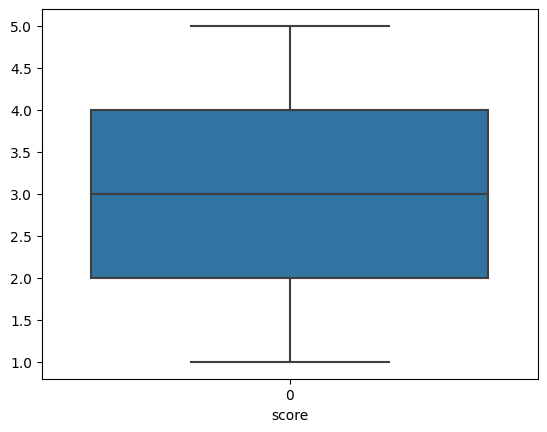

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(process_reviews['score'])
plt.xlabel('score')

In [32]:
# summary statistics
process_reviews['score'].describe()

count    12495.000000
mean         3.094198
std          1.457693
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: score, dtype: float64

From box plot and summary statistics, it can be said that the review score is symmetrically distributed with no outliers.

## Sentiments vs Helpful rate
We will look whether there any relationship between sentiment of review and helpfulness of it.

In [33]:
pd.DataFrame(process_reviews.groupby('sentiment')['thumbsUpCount'].mean())

thumbsUpCount
sentiment               
Negative        3.631134
Neutral         3.624812
Positive        2.343474

from matplotlib import pyplot as plt
_df_0['thumbsUpCount'].plot(kind='hist', bins=20, title='thumbsUpCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['thumbsUpCount'].plot(kind='line', figsize=(8, 4), title='thumbsUpCount')
plt.gca().spines[['top', 'right']].set_visible(False)

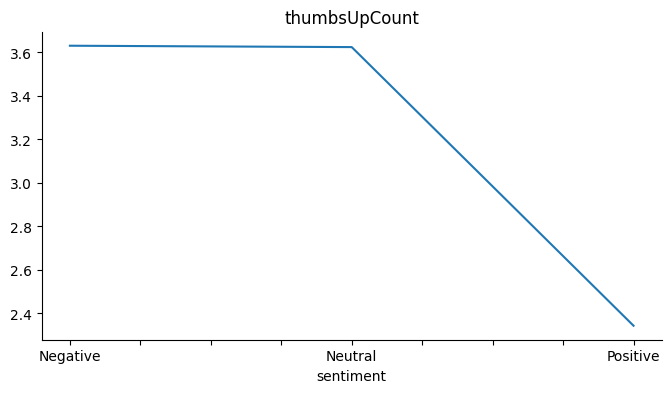

In [35]:
from matplotlib import pyplot as plt
_df_1['thumbsUpCount'].plot(kind='line', figsize=(8, 4), title='thumbsUpCount')
plt.gca().spines[['top', 'right']].set_visible(False)

From the table and diagram, we can see that the mean number of reviews helpful is higher for any negative reviews than neutral and positive reviews. These mean value might have been influenced by the 0 values in thumbsUpCount. Now, we will check how it is distributed through violin plot

In [36]:
# Creating dataframe and removing 0 helpful records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment', 'thumbsUpCount'])
senti_help = senti_help[senti_help['thumbsUpCount'] != 0.00]

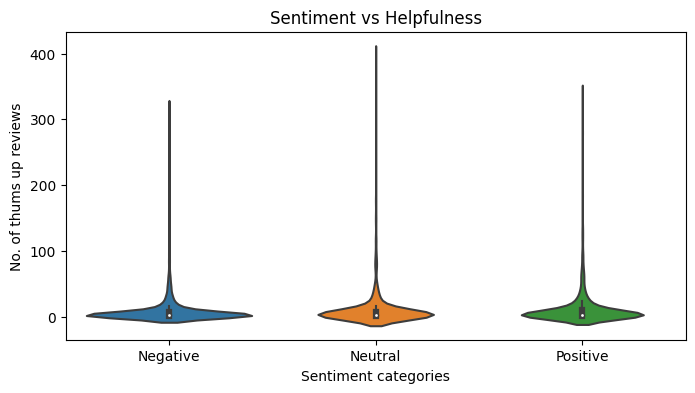

In [37]:
from matplotlib import rcParams

#plot layout
plt.rcParams.update({'font.size': 10})
rcParams['figure.figsize'] = (8,4)

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help['thumbsUpCount'])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('No. of thums up reviews')
plt.show()

Insights:
From the plot, negative reviews category's violin is more wider, it suggests more variability in the ratings for that category. While neutral category's violin is little taller than the other category, indicating a higher frequency of helpful reviews around a certain value. So, we can declare that more number of negative reviews are having more thumbs up.

### Splitting review time

In [38]:
# Extract month and year and create new columns for them
process_reviews['review_day'] = process_reviews['at'].dt.day
process_reviews['review_month'] = process_reviews['at'].dt.month
process_reviews['review_year'] = process_reviews['at'].dt.year

### Splitting reply/response time

In [39]:
# Extract month and year and create new columns for them
process_reviews['response_day'] = process_reviews['repliedAt'].dt.day
process_reviews['response_month'] = process_reviews['repliedAt'].dt.month
process_reviews['response_year'] = process_reviews['repliedAt'].dt.year

In [40]:
process_reviews.head()

reviewId  \
0  gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1  gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2  gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3  gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4  gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   

                                             content  score  thumbsUpCount  \
0                                   open app anymore      1              0   
1                  begging refund app month replying      1              0   
2  costly premium version approx indian rupees ye...      1              0   
3  organized updates made mess things cudnt leave...      1              0   
4                                   dan birthday oct      1              0   

                   at                                       replyContent  \
0 2020-10-27 21:24:41                                        No response   
1 2020-10-27 14:03:28  Please note that from checking our records, yo...   
2 2020-10-27 08:18:40                                        No response   
3 2020-10-26 13:28:07  What do you find troublesome about the update?...   
4 2020-10-26 06:10:50                                        No response   

            repliedAt sortOrder      appId sentiment  review_day  \
0 2020-05-27 16:38:27    newest  com.anydo  Negative          27   
1 2020-10-27 15:05:52    newest  com.anydo  Negative          27   
2 2020-05-27 16:38:27    newest  com.anydo  Negative          27   
3 2020-10-26 14:58:29    newest  com.anydo  Negative          26   
4 2020-05-27 16:38:27    newest  com.anydo  Negative          26   

   review_month  review_year  response_day  response_month  response_year  
0            10         2020            27               5           2020  
1            10         2020            27              10           2020  
2            10         2020            27               5           2020  
3            10         2020            26              10           2020  
4            10         2020            27               5           2020

## Year vs Sentiment count
We will see how many reviews were posted based on sentiments in each year from 2015 to 2020

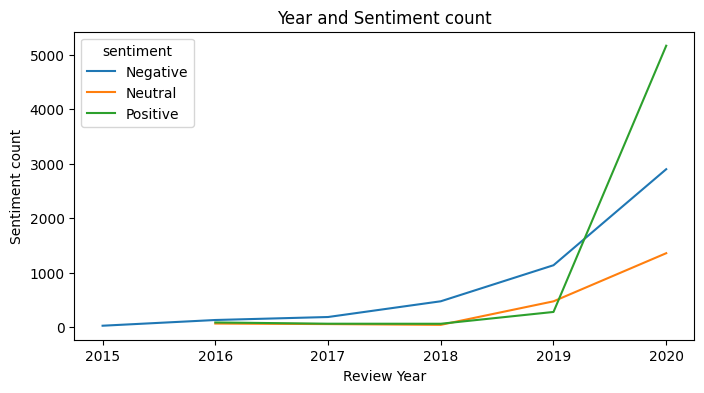

In [41]:
# Review Year
process_reviews.groupby(['review_year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Review Year')
plt.ylabel('Sentiment count')
plt.show()

### Insights:
From the plot we can clearly see the rise in positive reviews from 2019. Reaching its peak at 2020. While, negative and neutral reviews are very high as compared to the positive reviews from 2015 to 2018.

## Creating few more features for text analysis
### Sentiment polarity distribution
We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity.

In [42]:
from textblob import TextBlob

process_reviews['polarity'] = process_reviews['content'].map(lambda text: TextBlob(text).sentiment.polarity)

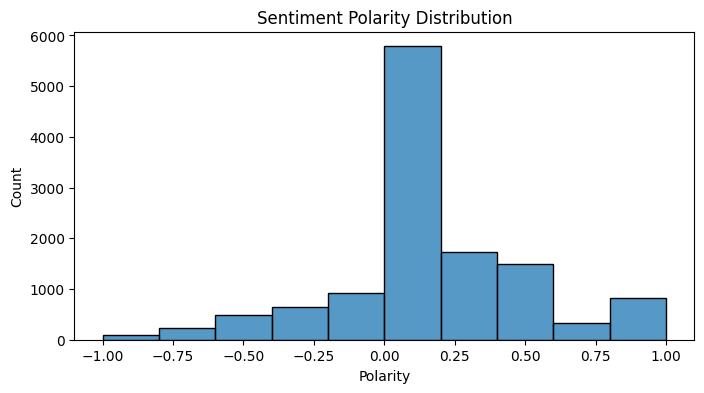

In [43]:
# Create a histogram using histplot
sns.histplot(process_reviews['polarity'],bins=10, kde=False)

# Add labels and title
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution')

# Show the plot
plt.show()

### Insights:
* We have a lot of positive polarities compared to the negative polarities.
* This polarity distributions assures the number of positive reviews we had.
* The distribution is slighly skewed.

## Wordcloud-Positive reviews

In [44]:
#Filtering data
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

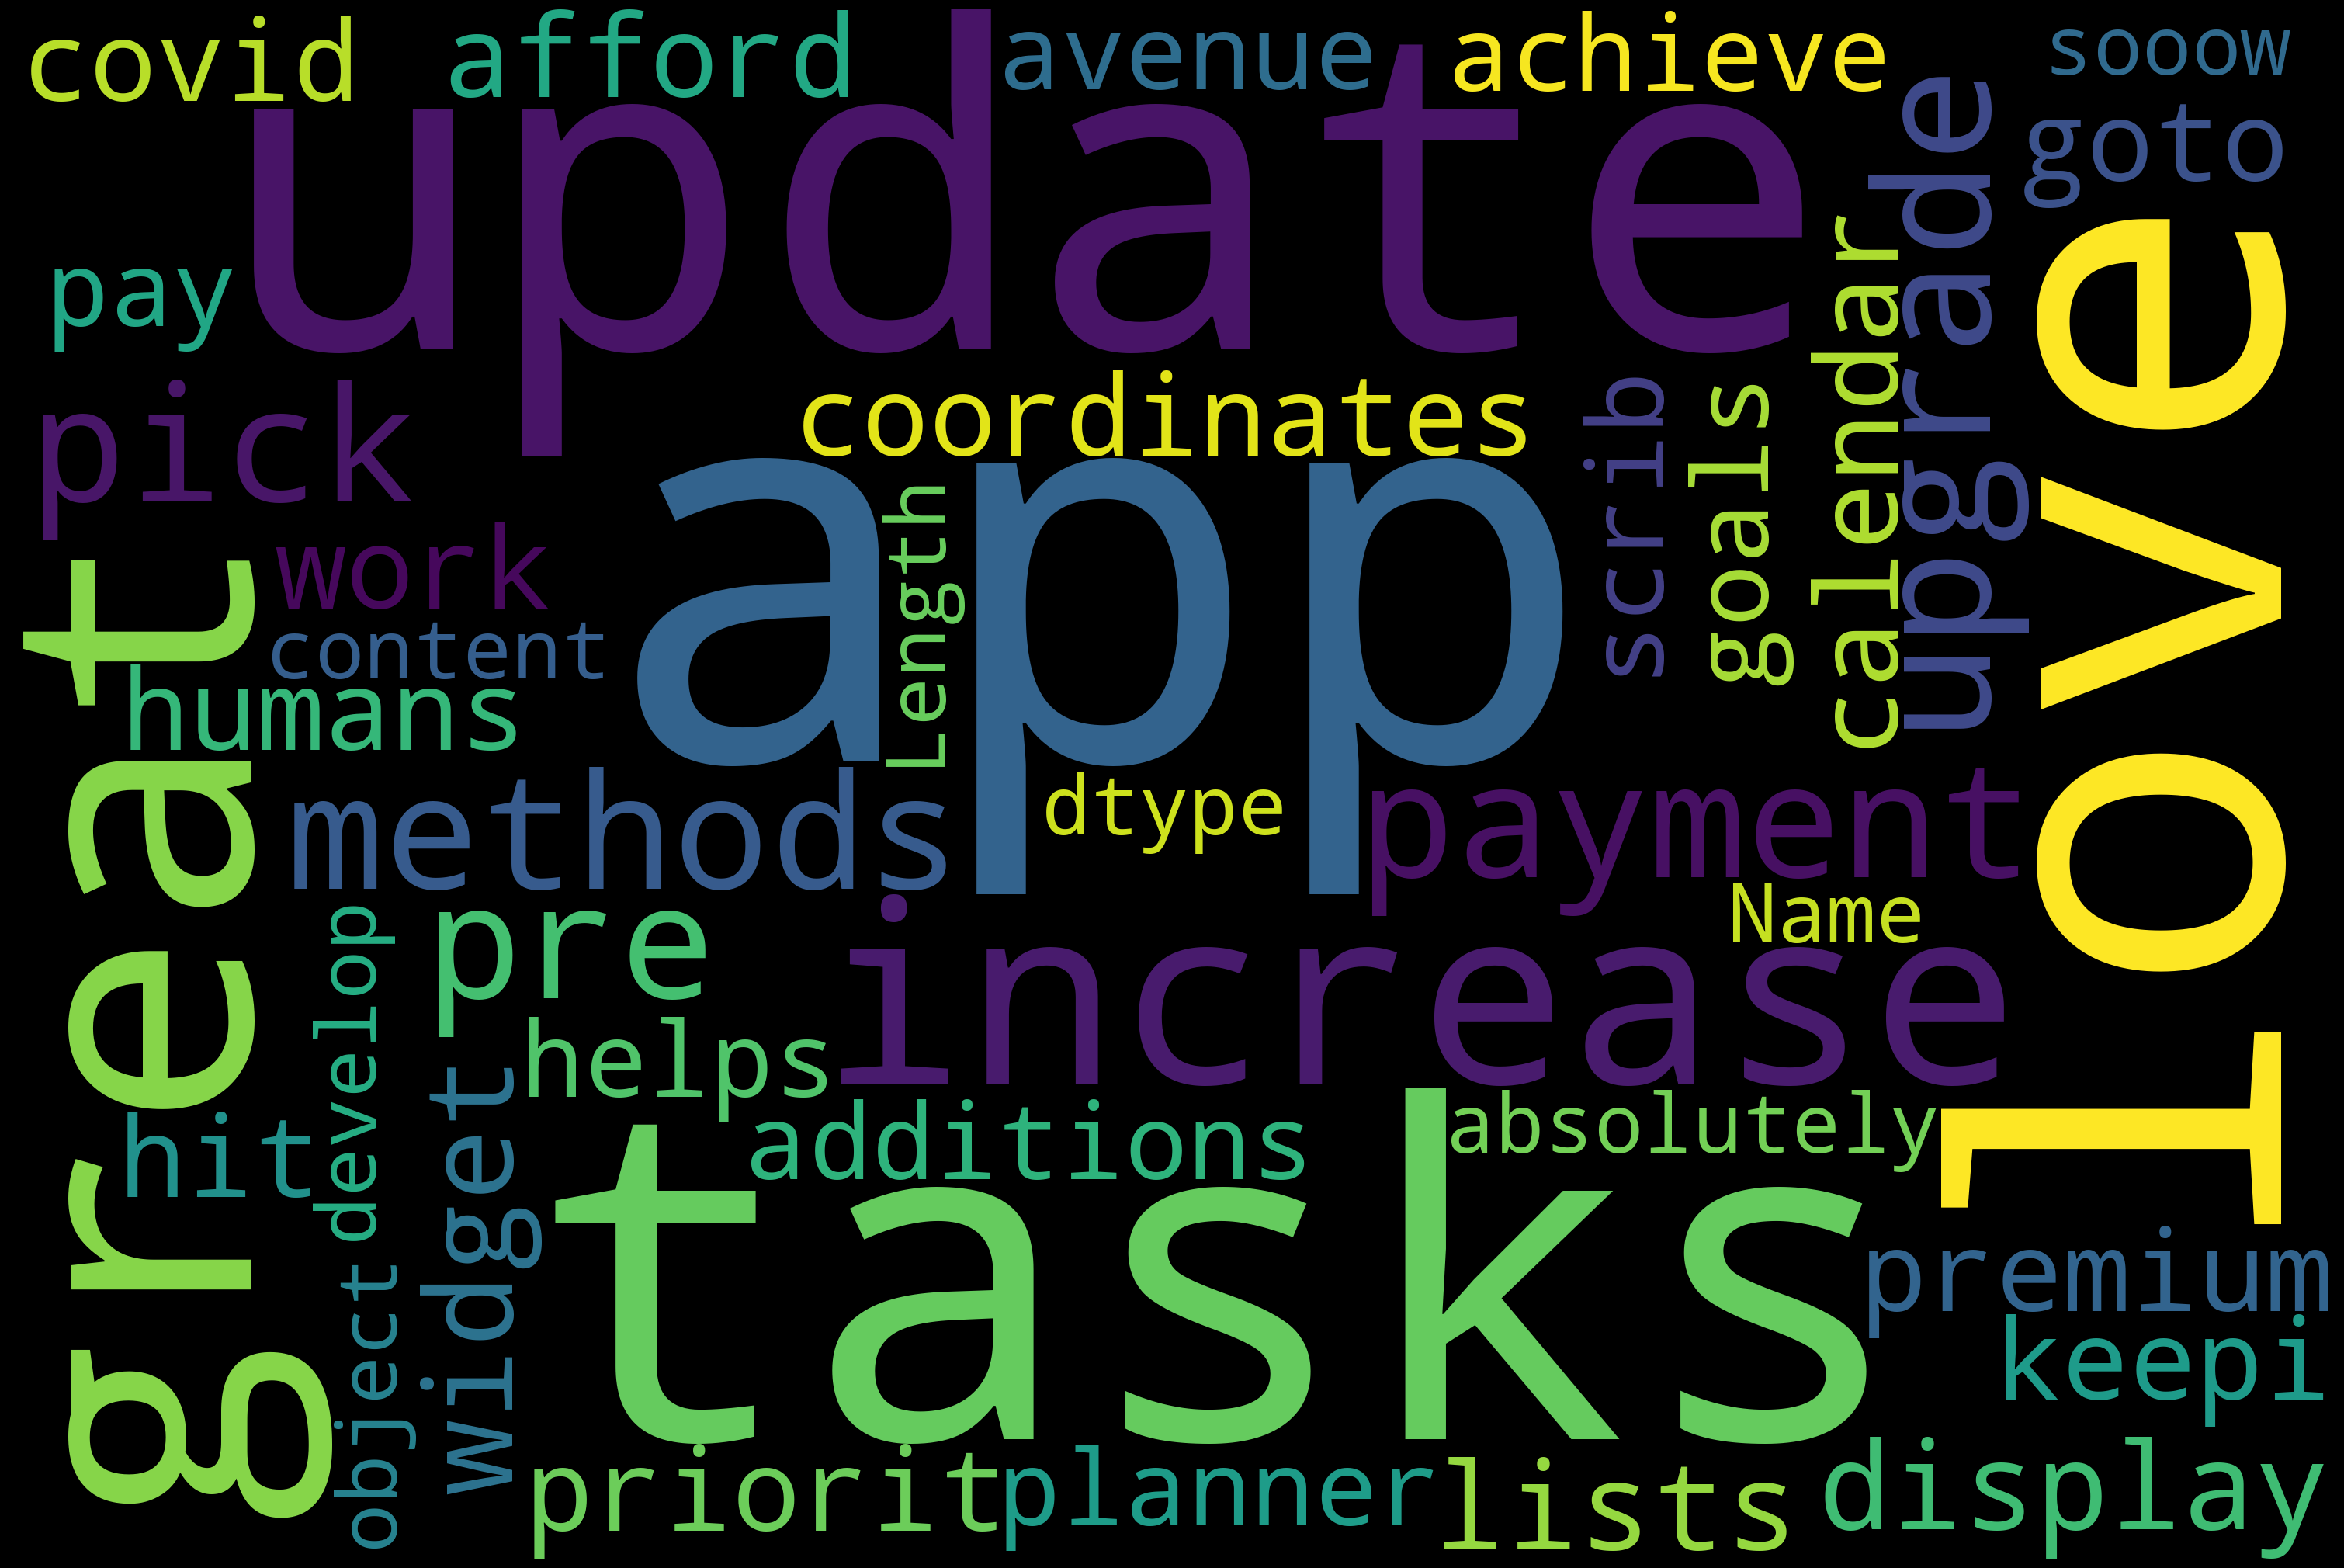

In [45]:
text = review_pos["content"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see positive words like better,great,useful etc.,

## Wordcloud-Neutral reviews

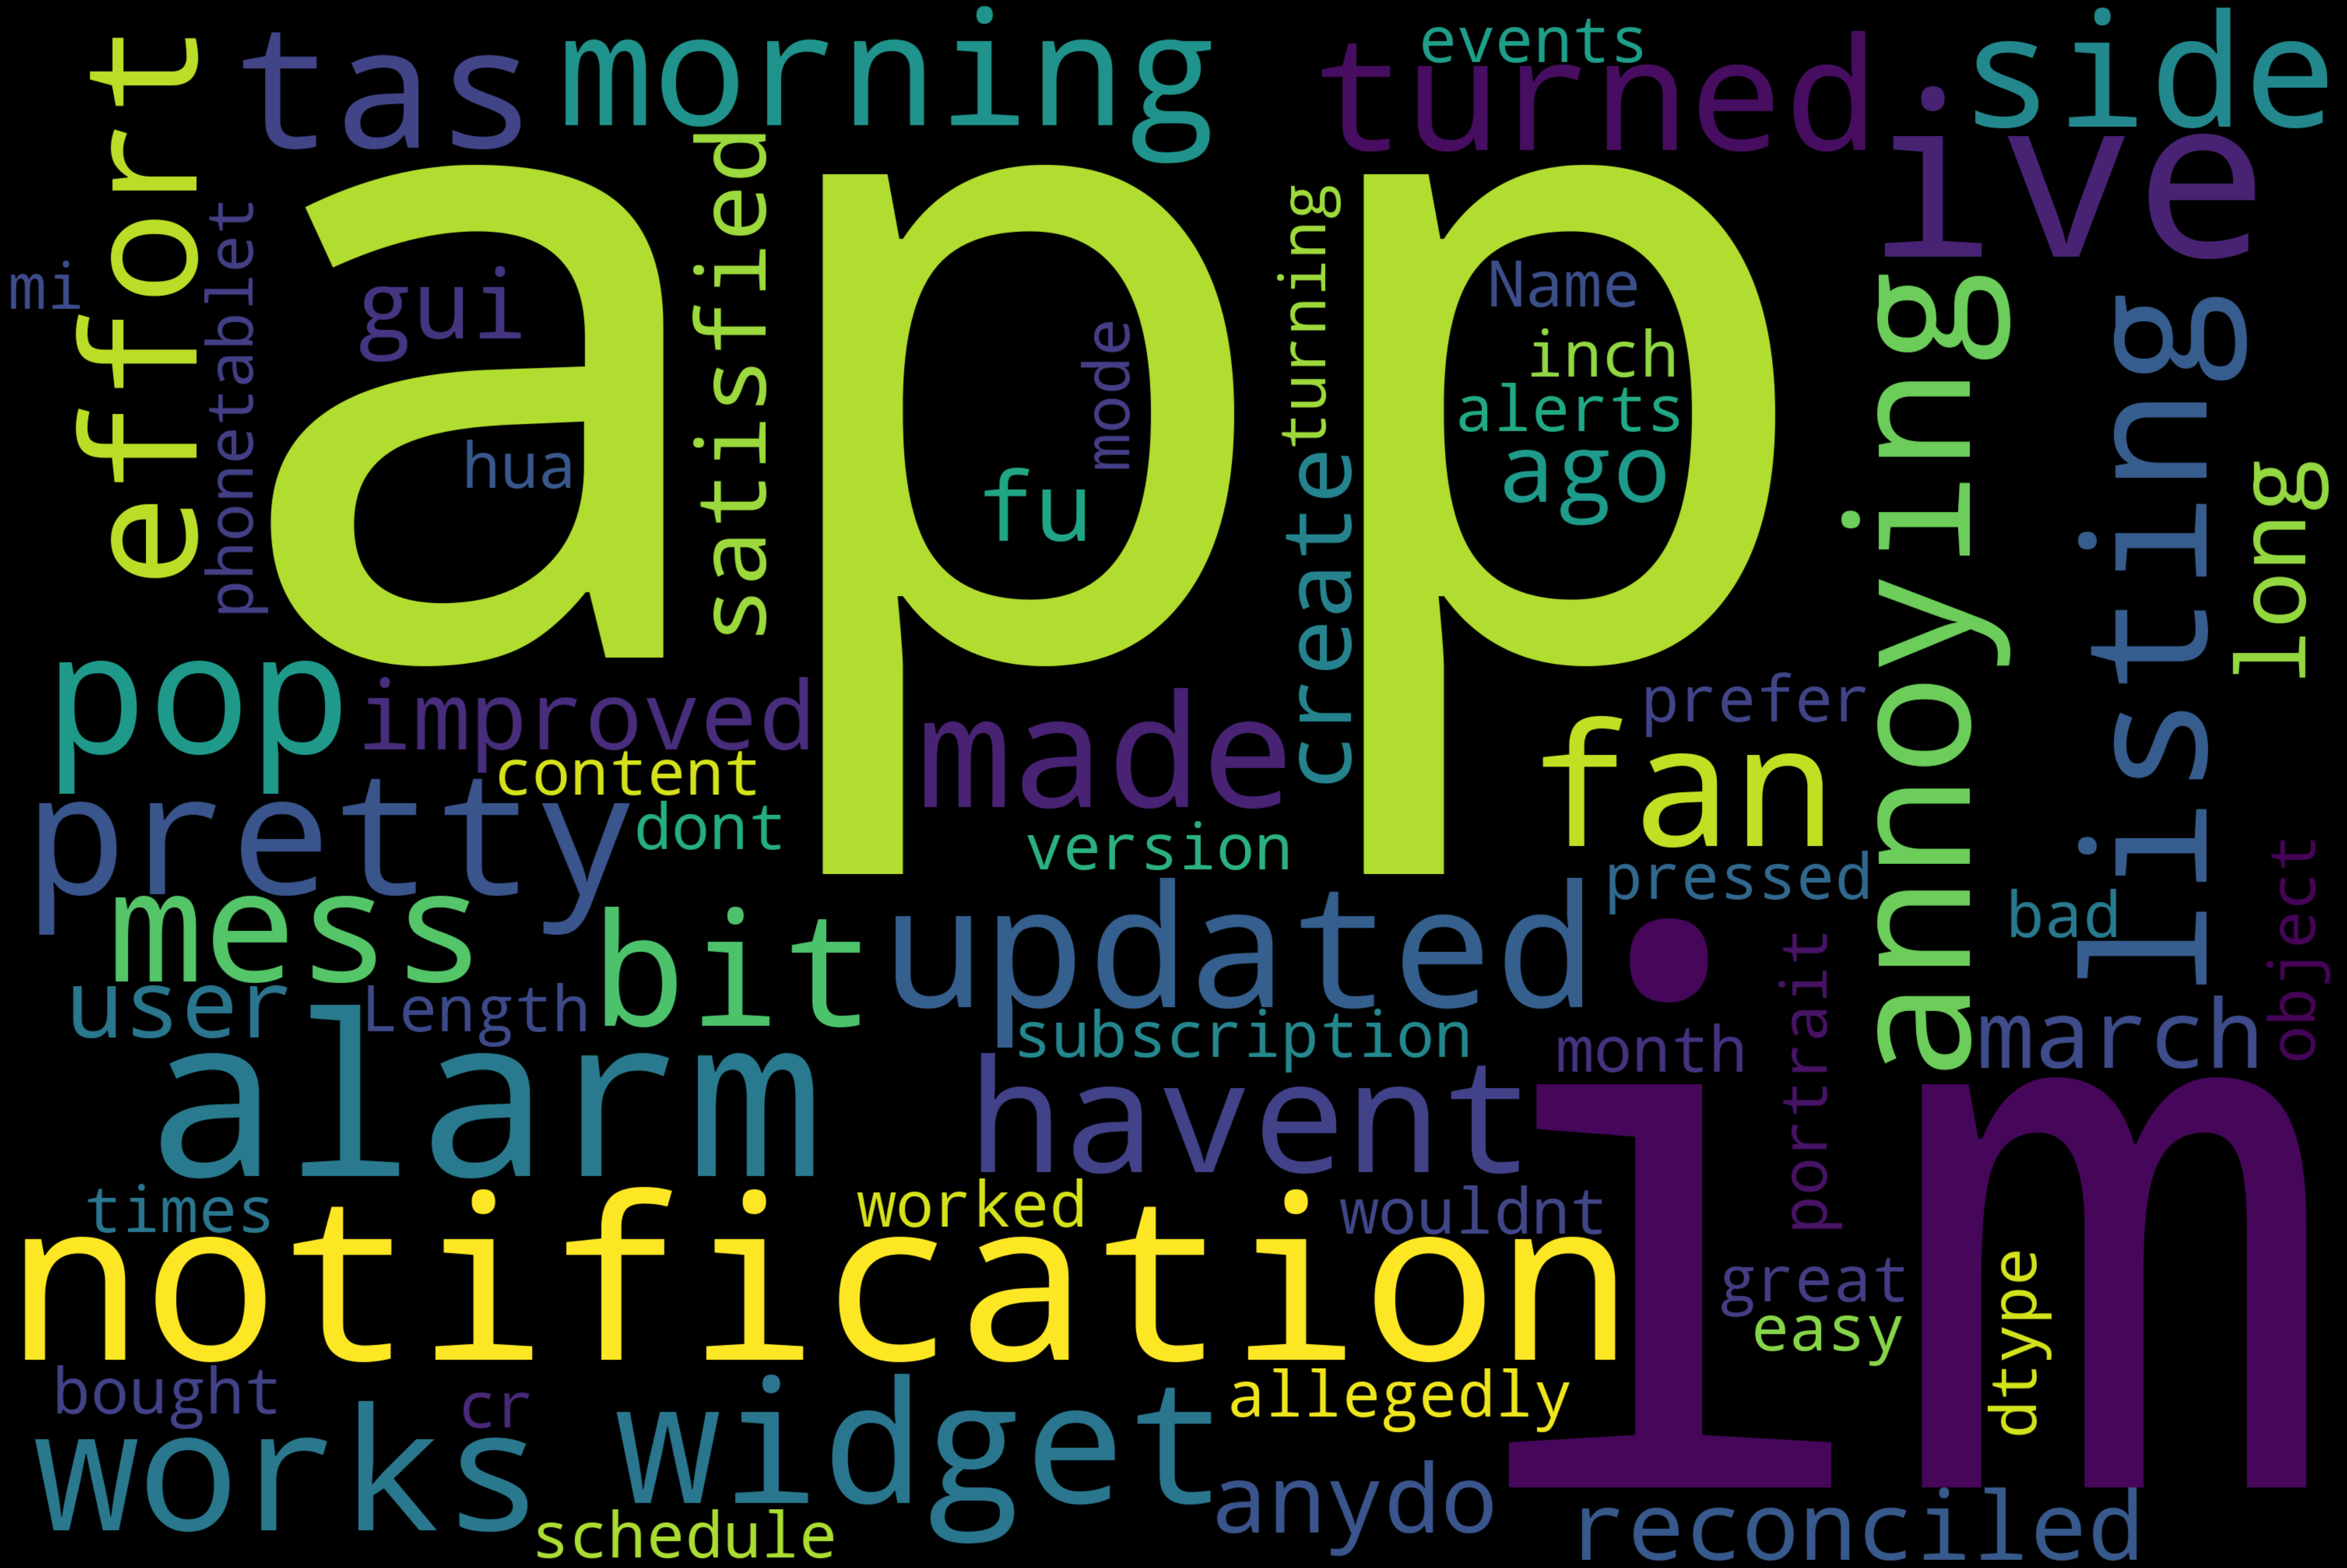

In [46]:
text = review_neu["content"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most of the neutral review words are focussed on the app and how can they be improved.

## Wordcloud-Negative reviews

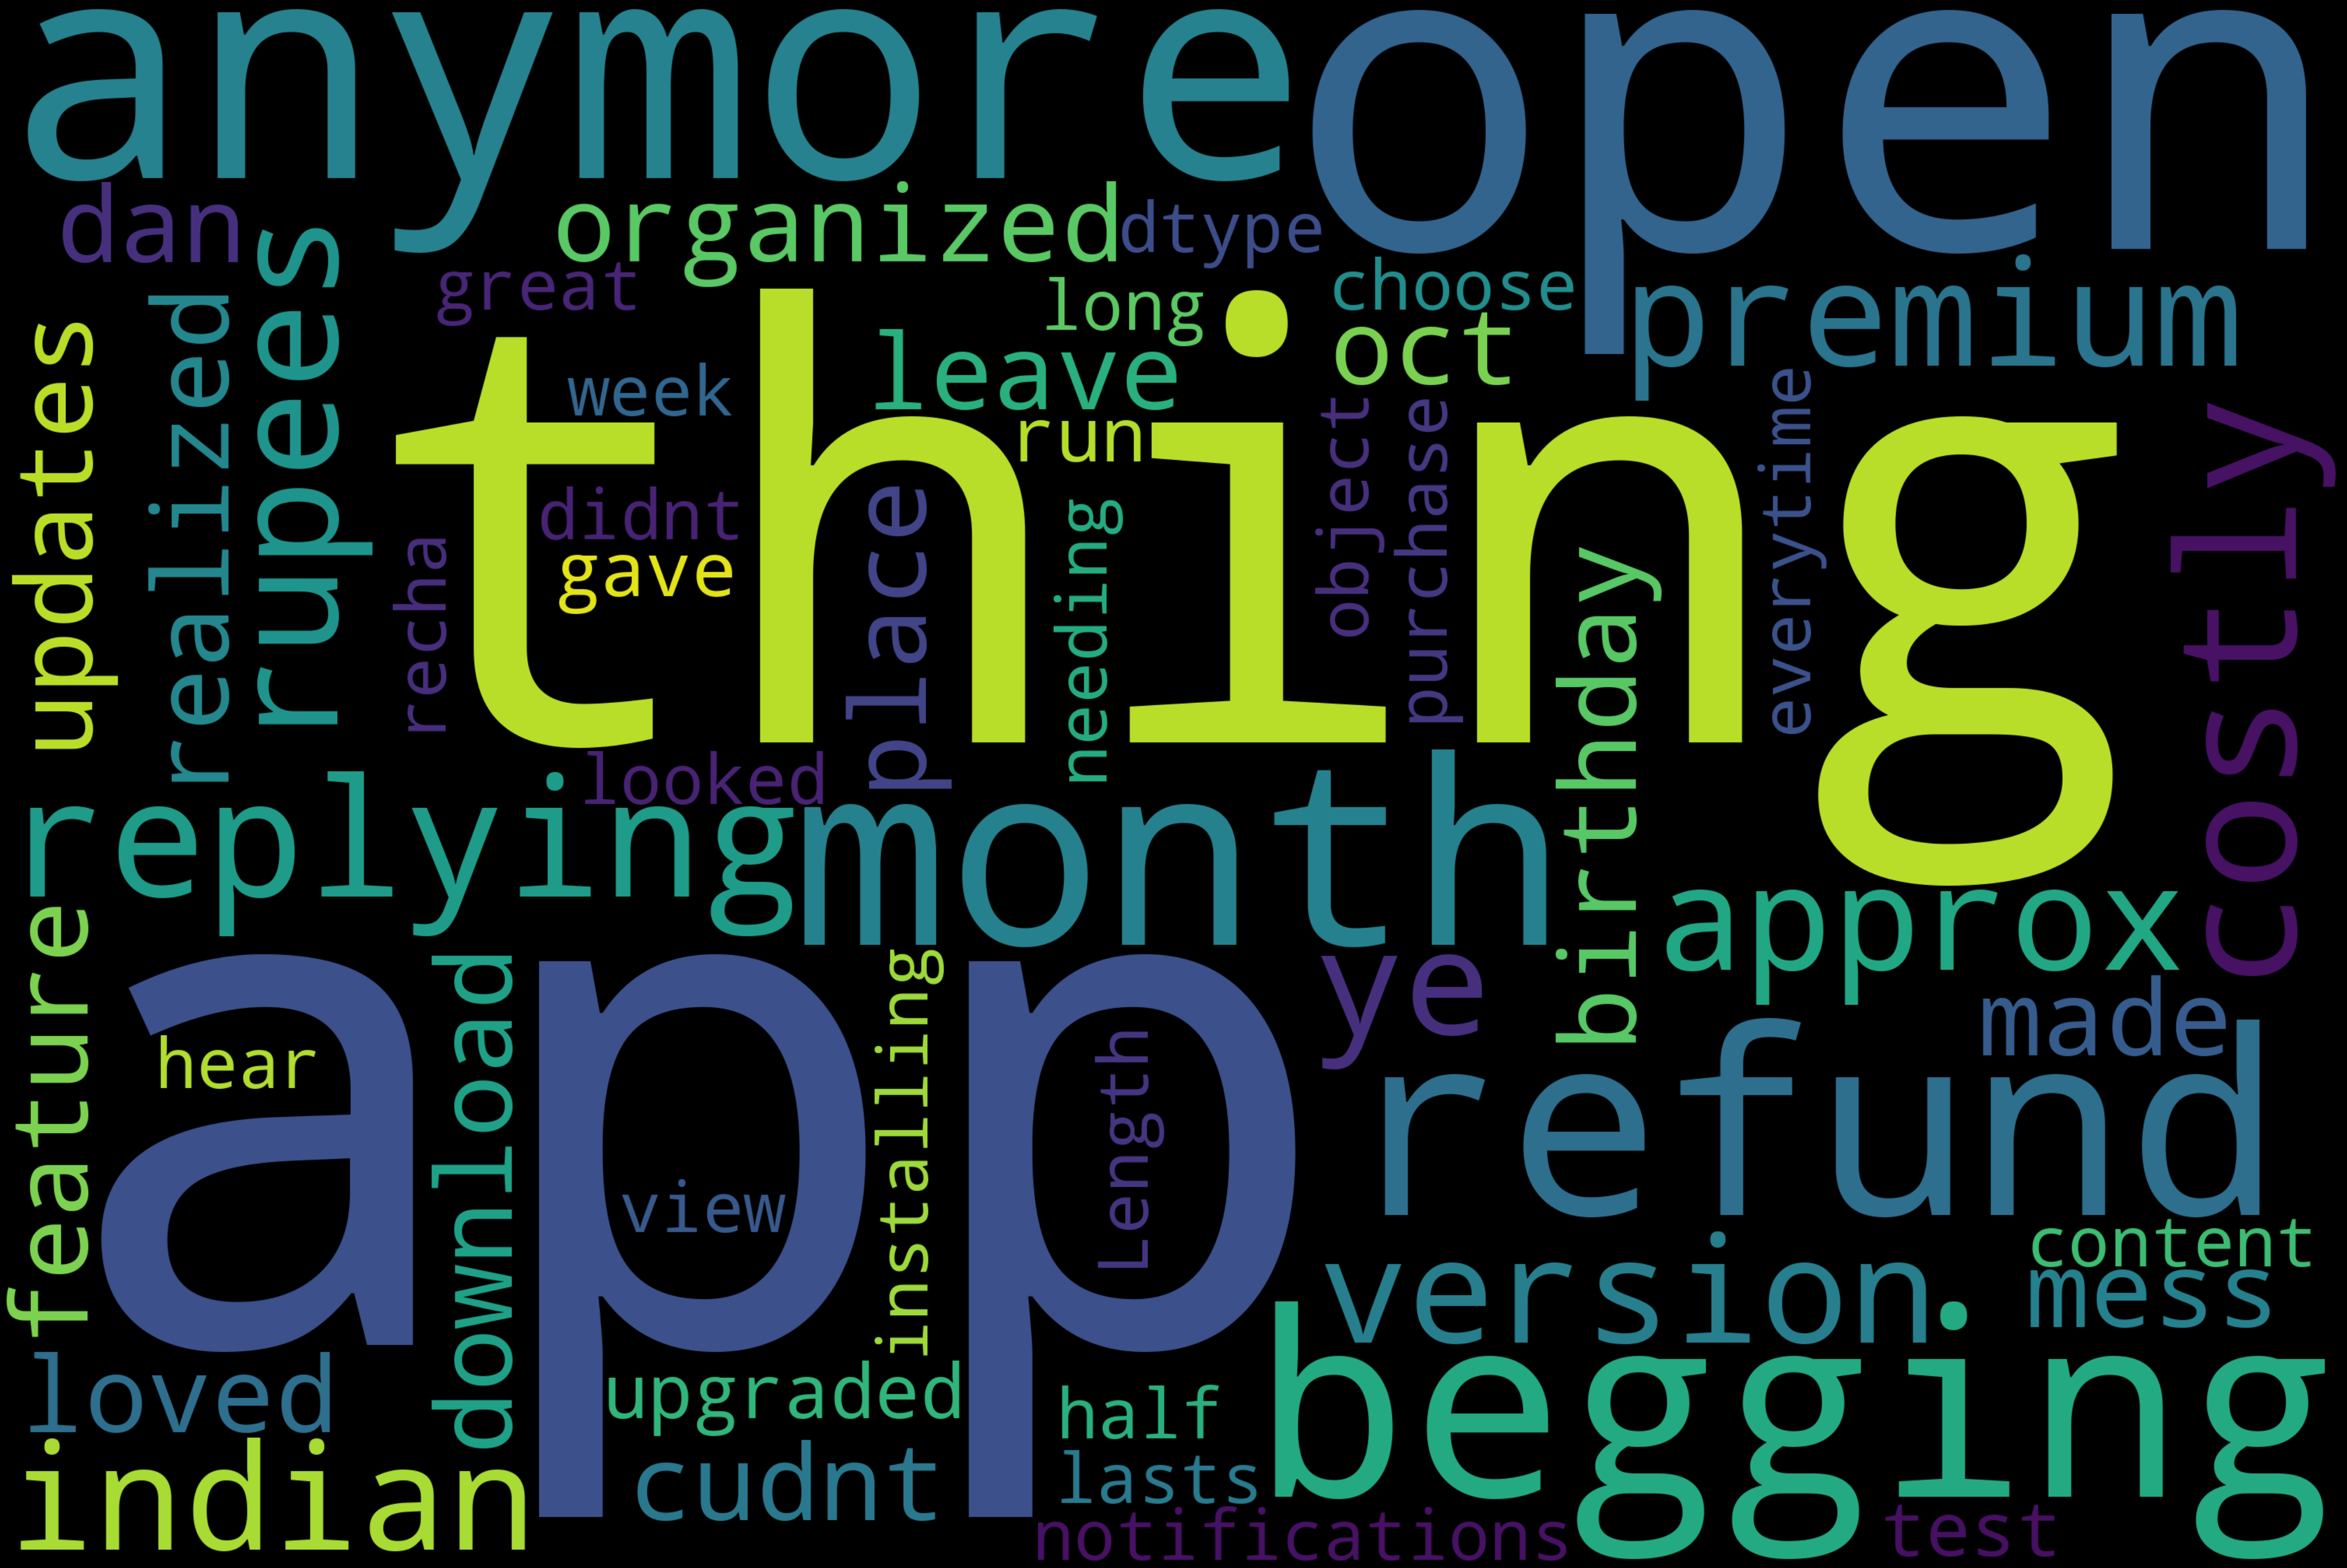

In [47]:
text = review_neg["content"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see negative review words such as refund,costly etc.,

# **Feature Extraction**
## Encoding target variable-sentiment
Encoding our target variable with Label encoder.

In [48]:
# calling the label encoder function
import sklearn
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment'])

In [49]:
process_reviews['sentiment'].unique()

array([0, 1, 2])

In [50]:
process_reviews['sentiment'].value_counts()

2    5654
0    4850
1    1991
Name: sentiment, dtype: int64

## Stemming the reviews
Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word.

In [51]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['content']].reset_index(drop=True)
review_features.head()

content
0                                   open app anymore
1                  begging refund app month replying
2  costly premium version approx indian rupees ye...
3  organized updates made mess things cudnt leave...
4                                   dan birthday oct

In [52]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['content'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [53]:
corpus[3]

'organ updat made mess thing cudnt leav enuf guess ur techi feel make justifi continu collect salari'

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF.

## TFIDF(Term Frequency — Inverse Document Frequency)

In [54]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['content'])

In [55]:
X.shape

(12495, 5000)

In [56]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

## Handling Imbalance target feature-SMOTE
In our target feature, we noticed that we got a lot of negative sentiments compared to positive and neutral. So it is crucial to balanced the classes in such situatio. Here we use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 5654, 0: 4850, 1: 1991})
Resampled dataset shape Counter({0: 5654, 1: 5654, 2: 5654})


## Train-test split
Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [58]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

# **Model Building**

First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process.



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=BernoulliNB()
svc_cv=SVC()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]

In [60]:
from sklearn.model_selection import cross_val_score

for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.5929574379503603
Decision Tree Test Accuracy: 0.5438964291433146
KNN Test Accuracy: 0.4539417774219376
SVC Test Accuracy: 0.6017594235388312
Naive Bayes Test Accuracy: 0.5719072538030424


From the results, we can see SVC outdone the rest of the algorithms.



In [61]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


## Classification metrics

In [66]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [70]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    display_labels=['Negative','Neutral','Positive'])

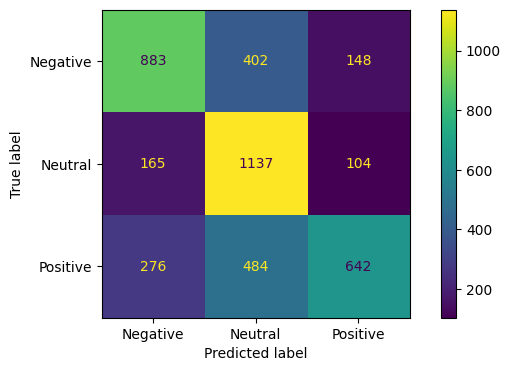

In [71]:
disp.plot()

Check out the diagonal elements(883+1137+642), they are correctly predicted records and rest are incorrectly classified by the algorithm.

In [72]:
from sklearn.metrics import classification_report

print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64      1433
           1       0.56      0.81      0.66      1406
           2       0.72      0.46      0.56      1402

    accuracy                           0.63      4241
   macro avg       0.65      0.63      0.62      4241
weighted avg       0.65      0.63      0.62      4241



Since predicting both positive,negative and neutral reviews are important we are considering. We got 63% as f1 score.

# **Popularity Based Recommendation**
Popularity based recommendation system works with the trend. It basically uses the items (apps) which are in trend right now. For example, if any apps which is usually bought by every new user then there are chances that it may suggest that apps to the new user.

In [ ]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=process_reviews.groupby("appId").filter(lambda x:x['score'].count() >=50)

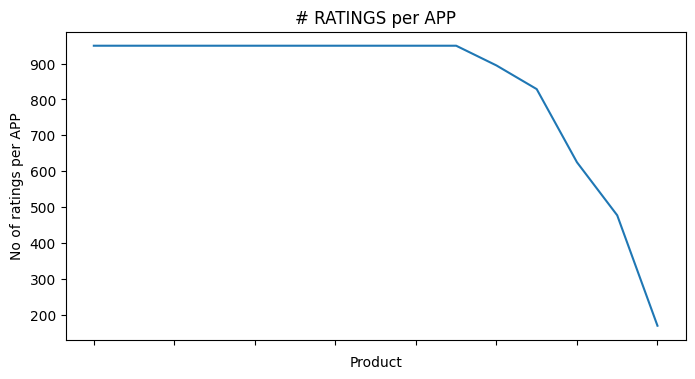

In [ ]:
no_of_ratings_per_product = new_df.groupby(by='appId')['score'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per APP')
plt.xlabel('Product')
plt.ylabel('No of ratings per APP')
ax.set_xticklabels([])

plt.show()

In [ ]:
#Average rating of the product

new_df.groupby('appId')['score'].mean().head()

appId
cc.forestapp            3.000000
com.anydo               3.000000
com.appgenix.bizcal     3.000000
com.appxy.planner       3.000000
com.artfulagenda.app    3.621302
Name: score, dtype: float64

In [ ]:
new_df.groupby('appId')['score'].mean().sort_values(ascending=False).head()

appId
com.habitnow              3.939203
com.levor.liferpgtasks    3.664000
com.artfulagenda.app      3.621302
com.tasks.android         3.185766
prox.lab.calclock         3.061453
Name: score, dtype: float64

In [ ]:
#Total no of rating for product

new_df.groupby('appId')['score'].count().sort_values(ascending=False).head()

appId
cc.forestapp                     950
com.anydo                        950
com.appgenix.bizcal              950
com.appxy.planner                950
com.gmail.jmartindev.timetune    950
Name: score, dtype: int64

In [ ]:
ratings_mean_count = pd.DataFrame(new_df.groupby('appId')['score'].mean())

In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('appId')['score'].count())

In [ ]:
ratings_mean_count.head()

score  rating_counts
appId                                        
cc.forestapp          3.000000            950
com.anydo             3.000000            950
com.appgenix.bizcal   3.000000            950
com.appxy.planner     3.000000            950
com.artfulagenda.app  3.621302            169

In [ ]:
ratings_mean_count['rating_counts'].max()

950

<Axes: >

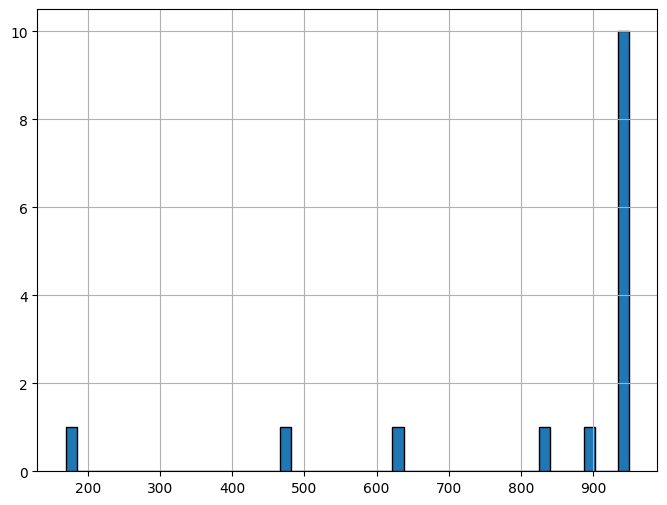

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Axes: >

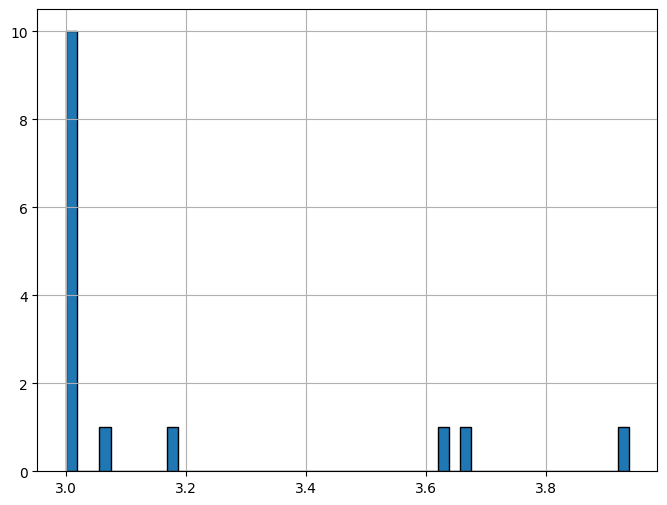

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['score'].hist(bins=50)

<Axes: xlabel='appId'>

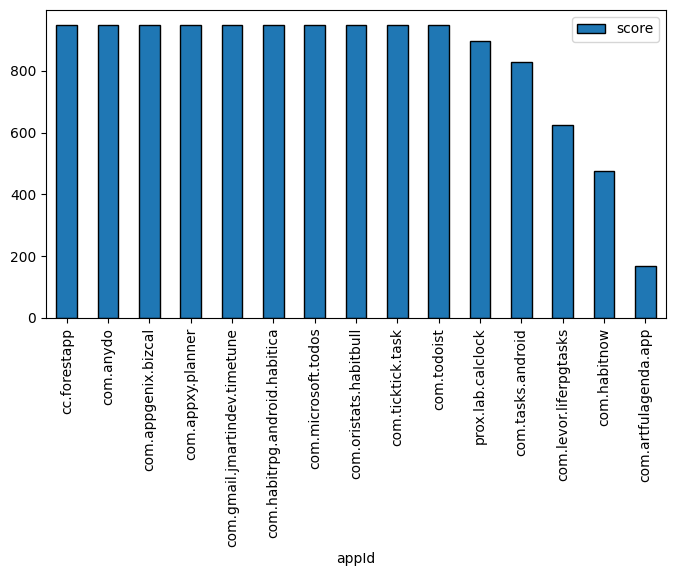

In [ ]:
popular_products = pd.DataFrame(new_df.groupby('appId')['score'].count())
most_popular = popular_products.sort_values('score', ascending=False)
most_popular.head(30).plot(kind = "bar")

## Collaberative filtering (Item-Item recommedation)
Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [ ]:
!pip install scikit-surprise
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163748 sha256=7799626a314512500132e3b43a18a460bd6c20c8b74f2908a991164d6caa199a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# creating new 2-way table that will contain review id and app id
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='score', index='reviewId', columns='appId', fill_value=0)
ratings_matrix.head()

appId                                               cc.forestapp  com.anydo  \
reviewId                                                                      
gp:AOqpTOE--_0I9KIm-9ahYqgT5BAbv8OMIoDkgT9q6AuM...             0          0   
gp:AOqpTOE-28LCTElqAxcYgwBVPSkcS06-rceT2Wiy8PLJ...             3          0   
gp:AOqpTOE-4q2-y9q2KVks5tLwWHTiQ2pEYAqgz2KnB_Bg...             0          0   
gp:AOqpTOE-5AkC9hyrvxVEz2snJIrqq6kRhzsSZ8xJ_XYa...             0          0   
gp:AOqpTOE-6vibU4_k4Dy8DnUXrbtRsNWInh0xs3aSYspT...             0          0   

appId                                               com.artfulagenda.app  \
reviewId                                                                   
gp:AOqpTOE--_0I9KIm-9ahYqgT5BAbv8OMIoDkgT9q6AuM...                     0   
gp:AOqpTOE-28LCTElqAxcYgwBVPSkcS06-rceT2Wiy8PLJ...                     0   
gp:AOqpTOE-4q2-y9q2KVks5tLwWHTiQ2pEYAqgz2KnB_Bg...                     0   
gp:AOqpTOE-5AkC9hyrvxVEz2snJIrqq6kRhzsSZ8xJ_XYa...                     0   
gp:AOqpTOE-6vibU4_k4Dy8DnUXrbtRsNWInh0xs3aSYspT...                     0   

appId                                               com.gmail.jmartindev.timetune  \
reviewId                                                                            
gp:AOqpTOE--_0I9KIm-9ahYqgT5BAbv8OMIoDkgT9q6AuM...                              0   
gp:AOqpTOE-28LCTElqAxcYgwBVPSkcS06-rceT2Wiy8PLJ...                              0   
gp:AOqpTOE-4q2-y9q2KVks5tLwWHTiQ2pEYAqgz2KnB_Bg...                              0   
gp:AOqpTOE-5AkC9hyrvxVEz2snJIrqq6kRhzsSZ8xJ_XYa...                              0   
gp:AOqpTOE-6vibU4_k4Dy8DnUXrbtRsNWInh0xs3aSYspT...                              0   

appId                                               com.habitnow  \
reviewId                                                           
gp:AOqpTOE--_0I9KIm-9ahYqgT5BAbv8OMIoDkgT9q6AuM...             0   
gp:AOqpTOE-28LCTElqAxcYgwBVPSkcS06-rceT2Wiy8PLJ...             0   
gp:AOqpTOE-4q2-y9q2KVks5tLwWHTiQ2pEYAqgz2KnB_Bg...             0   
gp:AOqpTOE-5AkC9hyrvxVEz2snJIrqq6kRhzsSZ8xJ_XYa...             0   
gp:AOqpTOE-6vibU4_k4Dy8DnUXrbtRsNWInh0xs3aSYspT...             0   

appId                                               com.habitrpg.android.habitica  \
reviewId                                                                            
gp:AOqpTOE--_0I9KIm-9ahYqgT5BAbv8OMIoDkgT9q6AuM...                              1   
gp:AOqpTOE-28LCTElqAxcYgwBVPSkcS06-rceT2Wiy8PLJ...                              0   
gp:AOqpTOE-4q2-y9q2KVks5tLwWHTiQ2pEYAqgz2KnB_Bg...                              0   
gp:AOqpTOE-5AkC9hyrvxVEz2snJIrqq6kRhzsSZ8xJ_XYa...                              0   
gp:AOqpTOE-6vibU4_k4Dy8DnUXrbtRsNWInh0xs3aSYspT...                              3   

appId                                               com.levor.liferpgtasks  \
reviewId                                                                     
gp:AOqpTOE--_0I9KIm-9ahYqgT5BAbv8OMIoDkgT9q6AuM...                       0   
gp:AOqpTOE-28LCTElqAxcYgwBVPSkcS06-rceT2Wiy8PLJ...                       0   
gp:AOqpTOE-4q2-y9q2KVks5tLwWHTiQ2pEYAqgz2KnB_Bg...                       0   
gp:AOqpTOE-5AkC9hyrvxVEz2snJIrqq6kRhzsSZ8xJ_XYa...                       0   
gp:AOqpTOE-6vibU4_k4Dy8DnUXrbtRsNWInh0xs3aSYspT...                       0   

appId                                               com.microsoft.todos  \
reviewId                                                                  
gp:AOqpTOE--_0I9KIm-9ahYqgT5BAbv8OMIoDkgT9q6AuM...                    0   
gp:AOqpTOE-28LCTElqAxcYgwBVPSkcS06-rceT2Wiy8PLJ...                    0   
gp:AOqpTOE-4q2-y9q2KVks5tLwWHTiQ2pEYAqgz2KnB_Bg...                    0   
gp:AOqpTOE-5AkC9hyrvxVEz2snJIrqq6kRhzsSZ8xJ_XYa...                    0   
gp:AOqpTOE-6vibU4_k4Dy8DnUXrbtRsNWInh0xs3aSYspT...                    0   

appId                                               com.oristats.habitbull  \
reviewId                                                                     
gp:AOqpTOE--_0I

As expected, the utility matrix obtaned above is sparce, the unknown values is filled up with 0.

In [ ]:
# dimension
ratings_matrix.shape

(10000, 13)

### Transposing the matrix

In [ ]:
X = ratings_matrix.T
X.head()

reviewId                       gp:AOqpTOE--_0I9KIm-9ahYqgT5BAbv8OMIoDkgT9q6AuMNyIFhu3GvKDd4Vnftt0l8O1Wc6Y3QKrkqffIHy4tqw  \
appId                                                                                                                      
cc.forestapp                                                                   0                                           
com.anydo                                                                      0                                           
com.artfulagenda.app                                                           0                                           
com.gmail.jmartindev.timetune                                                  0                                           
com.habitnow                                                                   0                                           

reviewId                       gp:AOqpTOE-28LCTElqAxcYgwBVPSkcS06-rceT2Wiy8PLJkO6QwbYfHKWAho0IwpqrXkrBmQEAsV7Z7b-iYImGyw  \
appId                                                                                                                      
cc.forestapp                                                                   3                                           
com.anydo                                                                      0                                           
com.artfulagenda.app                                                           0                                           
com.gmail.jmartindev.timetune                                                  0                                           
com.habitnow                                                                   0                                           

reviewId                       gp:AOqpTOE-4q2-y9q2KVks5tLwWHTiQ2pEYAqgz2KnB_Bge55Y-uPRkjlY_JP_5-Q1B7rDo0hRNpw2mK_iMuo7czA  \
appId                                                                                                                       
cc.forestapp                                                                   0                                            
com.anydo                                                                      0                                            
com.artfulagenda.app                                                           0                                            
com.gmail.jmartindev.timetune                                                  0                                            
com.habitnow                                                                   0                                            

reviewId                       gp:AOqpTOE-5AkC9hyrvxVEz2snJIrqq6kRhzsSZ8xJ_XYa7DPDskA0uEspVRyQ_mmk8lXx8MXxl6RYYZNPd6TDtg  \
appId                                                                                                                      
cc.forestapp                                                                   0                                           
com.anydo                                                                      0                                           
com.artfulagenda.app                                                           0                                           
com.gmail.jmartindev.timetune                                                  0                                           
com.habitnow                                                                   0                                           

reviewId                       gp:AOqpTOE-6vibU4_k4Dy8DnUXrbtRsNWInh0xs3aSYspTtjSGPbttPCCxW2oQxbZfEd2SjSG4ek5k6EJJzQ3bug  \
appId                                                                                                                      
cc.forestapp                                                                   0                                           
com.anydo                                                                      0                                           
com.artfulagenda.app 

In [ ]:
X.shape

(13, 10000)

### Unique apps in subset of data

In [ ]:
X1 = X

In [ ]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(13, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(13, 13)

In [ ]:
X.index[12]

'prox.lab.calclock'

## Index number of app ID reviewed by user

In [ ]:
i = "prox.lab.calclock"

app_names = list(X.index)
app_ID = app_names.index(i)
app_ID

12

Correlation for all apps with the apps used by this customer based on apps rated by other customers who used the same app.

In [ ]:
correlation_app_ID = correlation_matrix[app_ID]
correlation_app_ID

array([-0.11111111, -0.00783409, -0.1132713 ,  0.10612182,  0.0577892 ,
       -0.11415694, -0.11111111, -0.14327345, -0.15409869, -0.21292743,
       -0.08631164, -0.11573878,  1.        ])

In [ ]:
correlation_app_ID.shape

(13,)

### Recommending top 5 apps in sequence

In [ ]:
# list of top 5 apps
Recommend = list(X.index[ np.argsort(correlation_app_ID)[-5:]])

# Removes the apps already used by the customer
Recommend.remove(i)

Recommend[0:4]

['com.ticktick.task',
 'com.anydo',
 'com.habitnow',
 'com.gmail.jmartindev.timetune']

These are the top 5 apps to be displayed by the recommendation system to the above customer based on the rating history of other customers in the website.